In [1]:
from pandas import *
from matplotlib.pyplot import *

In [2]:
file_path = "../data/surveyDataSience.csv"
data = read_csv(file_path, skiprows=1, low_memory=False)

In [3]:
num_respondents = data.shape[0]

print("Numarul de respondenti este: ", num_respondents)

Numarul de respondenti este:  25973


In [7]:
num_attributes = data.shape[1]
print ("Numarul de atribute este: ", num_attributes)

attribute_types = data.dtypes.value_counts()
print("Tipul atributelor: ", attribute_types)

Numarul de atribute este:  369
Tipul atributelor:  object     338
float64     30
int64        1
Name: count, dtype: int64


In [8]:
first_7_columns = data.iloc[:, :7]

complete_respondents_first_7 = first_7_columns.dropna().shape[0]

print("Numărul de respondenți cu date complete pentru primele 7 coloane:", complete_respondents_first_7)

Numărul de respondenți cu date complete pentru primele 7 coloane: 25973


In [9]:
education_years = {
    "Bachelor’s degree": 3,
    "Master’s degree": 5,
    "Doctoral degree": 8
}

data_filtered = data.dropna(subset=["What is the highest level of formal education that you have attained or plan to attain within the next 2 years?"])

data_filtered["Years_of_Education"] = data_filtered[
    "What is the highest level of formal education that you have attained or plan to attain within the next 2 years?"
].map(education_years)

avg_years_all = data_filtered["Years_of_Education"].mean()

data_romania = data_filtered[data_filtered["In which country do you currently reside?"] == "Romania"]
avg_years_romania = data_romania["Years_of_Education"].mean()

data_romania_femei = data_romania[data_romania["What is your gender? - Selected Choice"] == "Woman"]
avg_years_romania_femei = data_romania_femei["Years_of_Education"].mean()

print("Durata medie a anilor de studii:")
print(f"- Toți respondenții: {avg_years_all:.2f} ani")
print(f"- Respondenții din România: {avg_years_romania:.2f} ani")
print(f"- Femeile din România: {avg_years_romania_femei:.2f} ani")

Durata medie a anilor de studii:
- Toți respondenții: 4.50 ani
- Respondenții din România: 5.08 ani
- Femeile din România: 5.43 ani


In [10]:
data_romania = data[data["In which country do you currently reside?"] == "Romania"]

data_romania_femei = data_romania[data_romania["What is your gender? - Selected Choice"] == "Woman"]

num_complete_romania_femei = data_romania_femei.dropna().shape[0]

print("Numărul de respondente femei din România cu date complete:", num_complete_romania_femei)

Numărul de respondente femei din România cu date complete: 0


In [11]:
python_females = data[(data["In which country do you currently reside?"] == "Romania") & (data["What is your gender? - Selected Choice"] == "Woman") & (data["What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python"] == "Python")]
num_python_females = python_females.shape[0]
age_interval_python = python_females["What is your age (# years)?"].value_counts().idxmax()

cpp_females = data[(data["In which country do you currently reside?"] == "Romania") & (data["What is your gender? - Selected Choice"] == "Woman") & (data["What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++"] == "C++")]
num_cpp_females = cpp_females.shape[0]
age_interval_cpp = cpp_females["What is your age (# years)?"].value_counts().idxmax()

print(f"Numarul de femei din Romania care programeaza in Python: {num_python_females}")
print(f"Intervalul de varsta cu cele mai multe femei care programeaza in Python: {age_interval_python}")
print(f"Numarul de femei din Romania care programeaza in C++: {num_cpp_females}")
print(f"Intervalul de varsta cu cele mai multe femei care programeaza in C++: {age_interval_cpp}")

Numarul de femei din Romania care programeaza in Python: 12
Intervalul de varsta cu cele mai multe femei care programeaza in Python: 35-39
Numarul de femei din Romania care programeaza in C++: 4
Intervalul de varsta cu cele mai multe femei care programeaza in C++: 18-21


In [12]:
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        print(f"{column}: Min = {data[column].min()}, Max = {data[column].max()}")
    else:
        print(f"{column}: Numar de valori posibile = {data[column].nunique()}")

Duration (in seconds): Min = 120, Max = 2488653
What is your age (# years)?: Numar de valori posibile = 11
What is your gender? - Selected Choice: Numar de valori posibile = 5
In which country do you currently reside?: Numar de valori posibile = 66
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?: Numar de valori posibile = 7
Select the title most similar to your current role (or most recent title if retired): - Selected Choice: Numar de valori posibile = 15
For how many years have you been writing code and/or programming?: Numar de valori posibile = 7
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python: Numar de valori posibile = 1
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R: Numar de valori posibile = 1
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL

In [13]:
data["Coding experience (in years)"] = (data["For how many years have you been writing code and/or programming?"].str.extract(r"(\d+)")[0].astype(float))

moments = data["Coding experience (in years)"].agg(["min", "max", "mean", "std", "median"])

print(moments)

min        1.000000
max       20.000000
mean       4.021210
std        5.241099
median     1.000000
Name: Coding experience (in years), dtype: float64


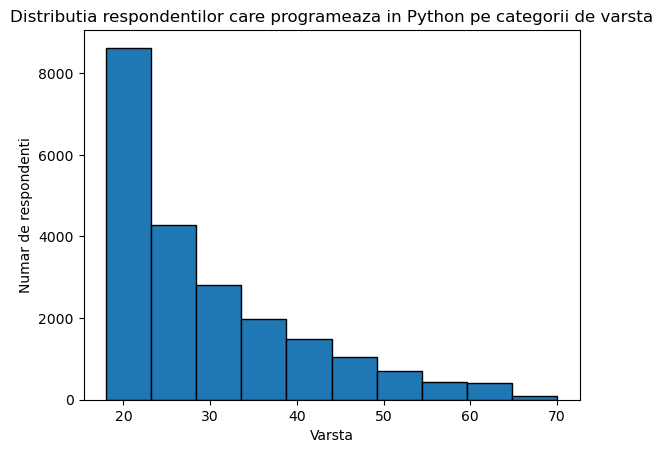

In [19]:
python_programmers = data[
    data["What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python"].notnull()
]

python_programmers = python_programmers.copy()
python_programmers["What is your age (# years)?"] = (
    python_programmers["What is your age (# years)?"].str.extract(r"(\d+)").astype(float)
)

hist = python_programmers["What is your age (# years)?"].plot.hist(bins=10, edgecolor="black")
hist.set_xlabel("Varsta")
hist.set_ylabel("Numar de respondenti")
hist.set_title("Distributia respondentilor care programeaza in Python pe categorii de varsta")

show()

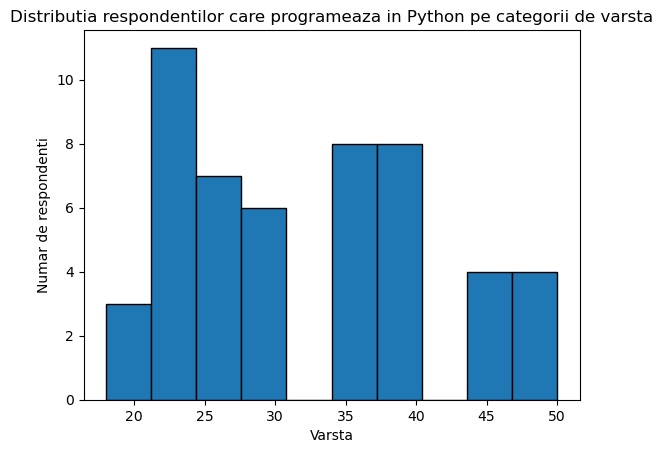

In [20]:
python_programmers_romania = data[
    (data["In which country do you currently reside?"] == "Romania") &
    (data["What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python"].notnull())
]

python_programmers_romania = python_programmers_romania.copy()
python_programmers_romania["What is your age (# years)?"] = (
    python_programmers_romania["What is your age (# years)?"].str.extract(r"(\d+)").astype(float)
)

hist = python_programmers_romania["What is your age (# years)?"].plot.hist(bins=10, edgecolor="black")
hist.set_xlabel("Varsta")
hist.set_ylabel("Numar de respondenti")
hist.set_title("Distributia respondentilor care programeaza in Python pe categorii de varsta")

show()

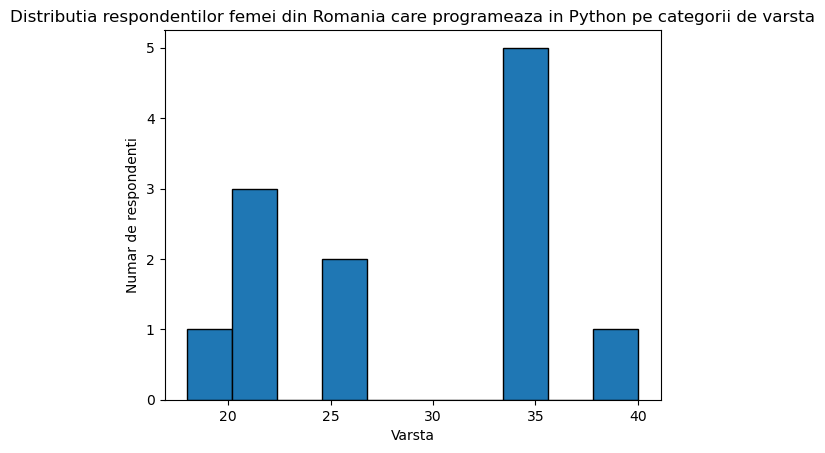

In [22]:
python_programmers_romania_womans = data[
    (data["In which country do you currently reside?"] == "Romania") &
    (data["What is your gender? - Selected Choice"] == "Woman") &
    (data["What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python"].notnull())
]

python_programmers_romania_females = python_programmers_romania_womans.copy()
python_programmers_romania_females["What is your age (# years)?"] = (
    python_programmers_romania_females["What is your age (# years)?"].str.extract(r"(\d+)").astype(float)
)

hist = python_programmers_romania_females["What is your age (# years)?"].plot.hist(bins=10, edgecolor="black")
hist.set_xlabel("Varsta")
hist.set_ylabel("Numar de respondenti")
hist.set_title("Distributia respondentilor femei din Romania care programeaza in Python pe categorii de varsta")

show()

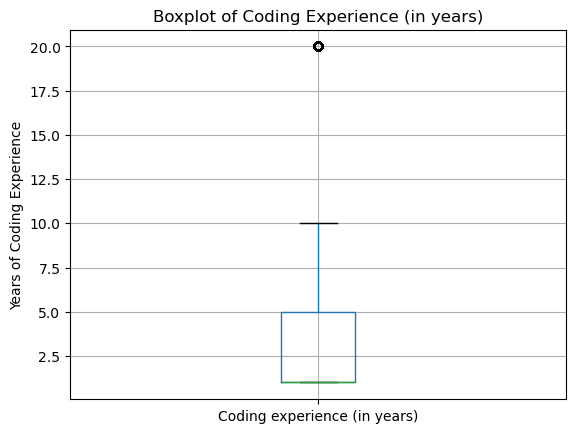

Outliers in terms of coding experience:
       Coding experience (in years)
1                              20.0
3                              20.0
16                             20.0
23                             20.0
69                             20.0
...                             ...
25862                          20.0
25887                          20.0
25910                          20.0
25924                          20.0
25963                          20.0

[1860 rows x 1 columns]


In [23]:
data["Coding experience (in years)"] = data["For how many years have you been writing code and/or programming?"].str.extract(r"(\d+)").astype(float)

boxplot = data.boxplot(column=["Coding experience (in years)"])
boxplot.set_title("Boxplot of Coding Experience (in years)")
boxplot.set_ylabel("Years of Coding Experience")

show()

Q1 = data["Coding experience (in years)"].quantile(0.25)
Q3 = data["Coding experience (in years)"].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data["Coding experience (in years)"] < (Q1 - 1.5 * IQR)) | (data["Coding experience (in years)"] > (Q3 + 1.5 * IQR))]

print("Outliers in terms of coding experience:")
print(outliers[["Coding experience (in years)"]])